<a href="https://colab.research.google.com/github/saloabdala/Actividad-4/blob/main/Actividad_4_(Regresi%C3%B3n_lineal_y_log%C3%ADstica)_tarea.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Salomón Abdalá Pérez, A01552356

In [ ]:
#Instalamos librería para análisis de variables categóricas  
%pip install funpymodeling

In [3]:
#Importar librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as special
from scipy.optimize import curve_fit
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from funpymodeling.exploratory import freq_tbl

In [ ]:
from google.colab import files
files.upload()

In [6]:
Microretailer = pd.read_excel('microretailer_mit_lift_lab_actualizado.xlsx')
Microretailer

,_record_id,_title,_server_updated_at,_updated_by,_geometry,_latitude,_longitude,228_store_name,229_store_picture,232_type_of_store,...,261_technology_organization,262_technology_serve_customers,263_technology_secure_sales,264_technology_budget,267_technology_investment_customer_preferences,234_willingness_participate_workshop,318_shopkeeper_name,319_shopkeepers_last_name,236_whatsapp,235_email
0,71326e5f-441e-4be7-bc68-b828973b8e3b,"November 17, 2022",2022-11-18 20:48:40 UTC,Uriel Bonilla,SRID=4326;POINT(-98.2013790035 19.0439654034),19.043965,-98.201379,Mini súper 7 hermanos,1 Photo,Grocery store (aka. nanostore),...,De acuerdo,Ni de acuerdo ni en desacuerdo,Ni de acuerdo ni en desacuerdo,Ni de acuerdo ni en desacuerdo,Ni de acuerdo ni en desacuerdo,no,NaN,NaN,NaN,NaN
1,a38b7c68-0afa-4419-a580-7086538b2e21,"November 17, 2022",2022-11-18 20:48:39 UTC,Uriel Bonilla,SRID=4326;POINT(-98.2016961782 19.0439749111),19.043975,-98.201696,Super papas Lulu,1 Photo,Grocery store (aka. nanostore),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,c11ef540-e06c-4722-a071-09a127ebc23c,"November 10, 2022",2022-11-18 20:48:38 UTC,Uriel Bonilla,SRID=4326;POINT(-98.1964474585 19.0432999683),19.043300,-98.196447,Arte Paquistán,1 Photo,Grocery store (aka. nanostore),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,c7434cb2-dde0-4901-80d7-3d60506ebd27,"November 10, 2022",2022-11-18 20:48:38 UTC,Uriel Bonilla,SRID=4326;POINT(-98.197072078 19.0405699102),19.040570,-98.197072,El vestir,1 Photo,Grocery store (aka. nanostore),...,En desacuerdo,NaN,En desacuerdo,Totalmente en desacuerdo,En desacuerdo,no,NaN,NaN,NaN,NaN
4,3c2177cc-677b-4106-8ed2-6e50f7671a0e,"November 17, 2022",2022-11-18 13:30:19 UTC,Fernando Báez,SRID=4326;POINT(-98.201134218 19.0436743967),19.043674,-98.201134,Antojitos Tony,1 Photo,Micro-restaurant (aka. fondita),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
325,efe2e285-c67e-4a07-8331-218bc4a7203d,"November 3, 2022",2022-11-03 17:05:23 UTC,Francisco Adán,SRID=4326;POINT(-98.194174 19.0431876),19.043188,-98.194174,Xuti Galería,1 Photo,productos tradicionales,...,Totalmente en desacuerdo,Totalmente en desacuerdo,Totalmente en desacuerdo,Totalmente en desacuerdo,De acuerdo,yes,Frida,Juárez Hernández,2.212380e+09,Hachi401096@gmail.com
326,2413f06e-15cc-4a6f-8e83-5224c6824b12,"November 3, 2022",2022-11-03 16:50:48 UTC,Emilio Garza,SRID=4326;POINT(-98.1940658722 19.0431145635),19.043115,-98.194066,July Store,1 Photo,Grocery store (aka. nanostore),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
327,9ff658db-4dc5-48b6-aa0b-5c6668bb6720,"November 3, 2022",2022-11-03 16:28:14 UTC,Emilio Garza,SRID=4326;POINT(-98.1934387078 19.0428094171),19.042809,-98.193439,La fonda,1 Photo,Micro-restaurant (aka. fondita),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
328,e88aa9c1-dc8b-4180-99a1-2e0118ad905d,"November 3, 2022",2022-11-03 16:18:37 UTC,Francisco Adán,SRID=4326;POINT(-98.193818 19.042558),19.042558,-98.193818,"Birria de Res ""Hermanos Negreros 2"" estilo Tij...",1 Photo,Micro-restaurant (aka. fondita),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
valores_nulos = Microretailer.isnull().sum()
valores_nulos

_record_id                                0
_title                                    0
_server_updated_at                        0
_updated_by                               0
_geometry                                 0
                                       ... 
234_willingness_participate_workshop    125
318_shopkeeper_name                     249
319_shopkeepers_last_name               252
236_whatsapp                            255
235_email                               283
Length: 106, dtype: int64

In [8]:
#Rellenamos nulos
Microretailer = Microretailer.fillna(method='ffill')

In [9]:
valores_nulos = Microretailer.isnull().sum()
valores_nulos

_record_id                               0
_title                                   0
_server_updated_at                       0
_updated_by                              0
_geometry                                0
                                        ..
234_willingness_participate_workshop     0
318_shopkeeper_name                      9
319_shopkeepers_last_name                9
236_whatsapp                             9
235_email                               11
Length: 106, dtype: int64

In [10]:
Microretailer = Microretailer.fillna(method = 'bfill')

In [11]:
valores_nulos = Microretailer.isnull().sum().sum()
valores_nulos

0

In [12]:
Microretailer

,_record_id,_title,_server_updated_at,_updated_by,_geometry,_latitude,_longitude,228_store_name,229_store_picture,232_type_of_store,...,261_technology_organization,262_technology_serve_customers,263_technology_secure_sales,264_technology_budget,267_technology_investment_customer_preferences,234_willingness_participate_workshop,318_shopkeeper_name,319_shopkeepers_last_name,236_whatsapp,235_email
0,71326e5f-441e-4be7-bc68-b828973b8e3b,"November 17, 2022",2022-11-18 20:48:40 UTC,Uriel Bonilla,SRID=4326;POINT(-98.2013790035 19.0439654034),19.043965,-98.201379,Mini súper 7 hermanos,1 Photo,Grocery store (aka. nanostore),...,De acuerdo,Ni de acuerdo ni en desacuerdo,Ni de acuerdo ni en desacuerdo,Ni de acuerdo ni en desacuerdo,Ni de acuerdo ni en desacuerdo,no,Angeles,Flores Tlahuisca,2.226697e+09,diana.escobarvarillas@gmail.com
1,a38b7c68-0afa-4419-a580-7086538b2e21,"November 17, 2022",2022-11-18 20:48:39 UTC,Uriel Bonilla,SRID=4326;POINT(-98.2016961782 19.0439749111),19.043975,-98.201696,Super papas Lulu,1 Photo,Grocery store (aka. nanostore),...,De acuerdo,Ni de acuerdo ni en desacuerdo,Ni de acuerdo ni en desacuerdo,Ni de acuerdo ni en desacuerdo,Ni de acuerdo ni en desacuerdo,no,Angeles,Flores Tlahuisca,2.226697e+09,diana.escobarvarillas@gmail.com
2,c11ef540-e06c-4722-a071-09a127ebc23c,"November 10, 2022",2022-11-18 20:48:38 UTC,Uriel Bonilla,SRID=4326;POINT(-98.1964474585 19.0432999683),19.043300,-98.196447,Arte Paquistán,1 Photo,Grocery store (aka. nanostore),...,De acuerdo,Ni de acuerdo ni en desacuerdo,Ni de acuerdo ni en desacuerdo,Ni de acuerdo ni en desacuerdo,Ni de acuerdo ni en desacuerdo,no,Angeles,Flores Tlahuisca,2.226697e+09,diana.escobarvarillas@gmail.com
3,c7434cb2-dde0-4901-80d7-3d60506ebd27,"November 10, 2022",2022-11-18 20:48:38 UTC,Uriel Bonilla,SRID=4326;POINT(-98.197072078 19.0405699102),19.040570,-98.197072,El vestir,1 Photo,Grocery store (aka. nanostore),...,En desacuerdo,Ni de acuerdo ni en desacuerdo,En desacuerdo,Totalmente en desacuerdo,En desacuerdo,no,Angeles,Flores Tlahuisca,2.226697e+09,diana.escobarvarillas@gmail.com
4,3c2177cc-677b-4106-8ed2-6e50f7671a0e,"November 17, 2022",2022-11-18 13:30:19 UTC,Fernando Báez,SRID=4326;POINT(-98.201134218 19.0436743967),19.043674,-98.201134,Antojitos Tony,1 Photo,Micro-restaurant (aka. fondita),...,En desacuerdo,Ni de acuerdo ni en desacuerdo,En desacuerdo,Totalmente en desacuerdo,En desacuerdo,no,Angeles,Flores Tlahuisca,2.226697e+09,diana.escobarvarillas@gmail.com
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
325,efe2e285-c67e-4a07-8331-218bc4a7203d,"November 3, 2022",2022-11-03 17:05:23 UTC,Francisco Adán,SRID=4326;POINT(-98.194174 19.0431876),19.043188,-98.194174,Xuti Galería,1 Photo,productos tradicionales,...,Totalmente en desacuerdo,Totalmente en desacuerdo,Totalmente en desacuerdo,Totalmente en desacuerdo,De acuerdo,yes,Frida,Juárez Hernández,2.212380e+09,Hachi401096@gmail.com
326,2413f06e-15cc-4a6f-8e83-5224c6824b12,"November 3, 2022",2022-11-03 16:50:48 UTC,Emilio Garza,SRID=4326;POINT(-98.1940658722 19.0431145635),19.043115,-98.194066,July Store,1 Photo,Grocery store (aka. nanostore),...,Totalmente en desacuerdo,Totalmente en desacuerdo,Totalmente en desacuerdo,Totalmente en desacuerdo,De acuerdo,yes,Frida,Juárez Hernández,2.212380e+09,Hachi401096@gmail.com
327,9ff658db-4dc5-48b6-aa0b-5c6668bb6720,"November 3, 2022",2022-11-03 16:28:14 UTC,Emilio Garza,SRID=4326;POINT(-98.1934387078 19.0428094171),19.042809,-98.193439,La fonda,1 Photo,Micro-restaurant (aka. fondita),...,Totalmente en desacuerdo,Totalmente en desacuerdo,Totalmente en desacuerdo,Totalmente en desacuerdo,De acuerdo,yes,Frida,Juárez Hernández,2.212380e+09,Hachi401096@gmail.com
328,e88aa9c1-dc8b-4180-99a1-2e0118ad905d,"November 3, 2022",2022-11-03 16:18:37 UTC,Francisco Adán,SRID=4326;POINT(-98.193818 19.042558),19.042558,-98.193818,"Birria de Res ""Hermanos Negreros 2"" estilo Tij...",1 Photo,Micro-restaurant (aka. fondita),...,Totalmente en des

# **Outliers**

In [13]:
#Filtro por columnas no consecutivas
filtro=Microretailer.iloc[:,[13,14,16,21,22,29,31,33,42,45,49,51,56,57,58,59,60,78,90]] #Columnas no consecutivas
filtro

,97_number_of_customers_in_store,268_number_fridges,104_how_many_shelves_does_the_micro_retailer_have,2_current_permanent_employees,4_number_permanent_employees_last_year,103_number_own_fridges,145_number_direct_competitors,24_burnout,272_card_days_receive_money,275_platform_days_receive_money,276_expected_days_informal_credit,36_credit_default_rate,315_frequency_topups,316_frequency_utility_bills,317_home_deliveries,62_frequency_only_services,78_number_home_deliveries_week,172_supplier_frequency,163_number_high_perishable_products
0,1,3.0,3,2.0,10.0,3.0,5.0,2.0,0.0,0.0,1.0,1.0,20.0,2.0,4.0,10.0,3.0,2.0,10.0
1,2,0.0,0,2.0,10.0,3.0,5.0,2.0,0.0,0.0,1.0,1.0,20.0,2.0,4.0,10.0,3.0,2.0,10.0
2,2,0.0,0,2.0,10.0,3.0,5.0,2.0,0.0,0.0,1.0,1.0,20.0,2.0,4.0,10.0,3.0,2.0,10.0
3,1,0.0,0,0.0,0.0,3.0,10.0,2.0,0.0,0.0,1.0,1.0,20.0,2.0,4.0,10.0,3.0,1.0,0.0
4,3,2.0,3,0.0,0.0,3.0,10.0,2.0,0.0,0.0,1.0,1.0,20.0,2.0,4.0,10.0,3.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
325,0,1.0,7,4.0,2.0,2.0,5.0,7.0,1.0,7.0,2.0,0.0,1.0,7.0,8.0,1.0,1.0,5.0,0.0
326,1,0.0,5,4.0,2.0,2.0,5.0,7.0,1.0,7.0,2.0,0.0,1.0,7.0,8.0,1.0,1.0,5.0,0.0
327,3,1.0,1,4.0,2.0,2.0,5.0,7.0,1.0,7.0,2.0,0.0,1.0,7.0,8.0,1.0,1.0,5.0,0.0
328,0,1.0,1,4.0,2.0,2.0,5.0,7.0,1.0,7.0,2.0,0.0,1.0,7.0,8.0,1.0,1.0,5.0,0.0


In [14]:
#Método aplicación Cuartiles, Encuentro cuartiles 0.25 y 0.75
y = filtro

percentile25 = y.quantile(0.25) #Q1
percentile75 = y.quantile(0.75) #Q3
iqr = percentile75 - percentile25

Limite_Superior_iqr= percentile75 + 1.5*iqr
Limite_Inferior_iqr= percentile25 - 1.5*iqr
print('Limite superior permitido', Limite_Superior_iqr)
print('Limite inferior permitido', Limite_Inferior_iqr)

Limite superior permitido 97_number_of_customers_in_store                       5.0
268_number_fridges                                    5.0
104_how_many_shelves_does_the_micro_retailer_have    13.5
2_current_permanent_employees                         3.5
4_number_permanent_employees_last_year                5.0
103_number_own_fridges                                6.0
145_number_direct_competitors                         9.5
24_burnout                                           12.0
272_card_days_receive_money                           2.5
275_platform_days_receive_money                      14.5
276_expected_days_informal_credit                    18.5
36_credit_default_rate                                2.5
315_frequency_topups                                 14.5
316_frequency_utility_bills                           3.5
317_home_deliveries                                  22.0
62_frequency_only_services                           12.5
78_number_home_deliveries_week                

In [15]:
outliers_iqr = filtro[(y>Limite_Superior_iqr)|(y<Limite_Inferior_iqr)]

In [16]:
data2_iqr= filtro[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]

In [17]:
#Comprobamos outliers
valores_nulos=data2_iqr.isnull().sum()
valores_nulos

97_number_of_customers_in_store                      12
268_number_fridges                                   16
104_how_many_shelves_does_the_micro_retailer_have    22
2_current_permanent_employees                        47
4_number_permanent_employees_last_year               25
103_number_own_fridges                               16
145_number_direct_competitors                        29
24_burnout                                            0
272_card_days_receive_money                          26
275_platform_days_receive_money                       0
276_expected_days_informal_credit                    22
36_credit_default_rate                               17
315_frequency_topups                                 63
316_frequency_utility_bills                          61
317_home_deliveries                                   8
62_frequency_only_services                           44
78_number_home_deliveries_week                        0
172_supplier_frequency                          

In [18]:
#Reemplazar valores atípicos (nulos) del dataframe con "mean"
data3_iqr = data2_iqr.copy()
data3_iqr = data2_iqr.fillna(round(data3_iqr.mean(),1))

In [19]:
#Comprobamos outliers
valores_nulos=data3_iqr.isnull().sum()
valores_nulos

97_number_of_customers_in_store                      0
268_number_fridges                                   0
104_how_many_shelves_does_the_micro_retailer_have    0
2_current_permanent_employees                        0
4_number_permanent_employees_last_year               0
103_number_own_fridges                               0
145_number_direct_competitors                        0
24_burnout                                           0
272_card_days_receive_money                          0
275_platform_days_receive_money                      0
276_expected_days_informal_credit                    0
36_credit_default_rate                               0
315_frequency_topups                                 0
316_frequency_utility_bills                          0
317_home_deliveries                                  0
62_frequency_only_services                           0
78_number_home_deliveries_week                       0
172_supplier_frequency                               0
163_number

# **Regresión Lineal**

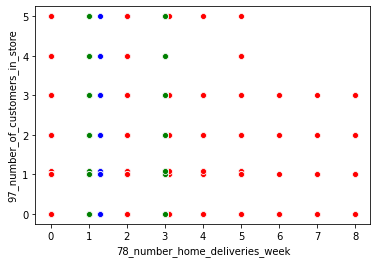

In [20]:
#Se grafican mapas de dispersión de las variables 3 variables
from turtle import color

sns.scatterplot(x='2_current_permanent_employees',y='97_number_of_customers_in_store',color='blue',data=data3_iqr)
sns.scatterplot(x='145_number_direct_competitors',y='97_number_of_customers_in_store',color='red',data=data3_iqr)
sns.scatterplot(x='78_number_home_deliveries_week',y='97_number_of_customers_in_store',color='green',data=data3_iqr)

In [104]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Var_Indep= data3_iqr[['2_current_permanent_employees','145_number_direct_competitors','78_number_home_deliveries_week']]
Var_Dep = data3_iqr['97_number_of_customers_in_store']

In [105]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [106]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [107]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Var_Indep, y=Var_Dep)

LinearRegression()

In [108]:
#Verificamos coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'normalize': 'deprecated',
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['2_current_permanent_employees', '145_number_direct_competitors',
        '78_number_home_deliveries_week'], dtype=object),
 'n_features_in_': 3,
 'coef_': array([0.10392455, 0.03688242, 0.05415778]),
 '_residues': 525.1139121959028,
 'rank_': 3,
 'singular_': array([37.04957144, 16.86963103, 15.32478343]),
 'intercept_': 0.7640426930967733}

In [109]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R2 Determinación
model.score(Var_Indep,Var_Dep)

0.010436383550985084

In [110]:
#Predecimos los valores de total de accidentes a partir de las variables: alcohol, speeding y no previous
y_pred= model.predict(X=data3_iqr[['2_current_permanent_employees','145_number_direct_competitors','78_number_home_deliveries_week']])
y_pred

array([1.31877725, 1.31877725, 1.31877725, 1.04085155, 1.04085155,
       1.04085155, 1.04085155, 1.04085155, 1.17226522, 0.96339845,
       1.13436513, 1.4227018 , 1.28189483, 1.20812998, 1.14781058,
       1.067323  , 1.17797028, 1.10420543, 1.14781058, 1.34893695,
       1.03044058, 1.31877725, 1.17124755, 1.28189483, 1.0371633 ,
       1.42942453, 1.24870065, 1.10420543, 1.14108785, 1.03044058,
       1.4227018 , 1.17226522, 1.17226522, 1.17226522, 1.0371633 ,
       1.0371633 , 1.0371633 , 1.31877725, 1.31877725, 1.04085155,
       1.067323  , 1.23828968, 1.20914764, 1.20914764, 1.20914764,
       1.20914764, 1.0371633 , 0.96339845, 0.96339845, 1.31877725,
       1.31877725, 1.31877725, 1.31877725, 1.31877725, 1.31877725,
       1.31877725, 1.31877725, 1.31877725, 1.31877725, 1.49646665,
       1.31979492, 1.2148527 , 1.24603007, 1.32549998, 0.92651603,
       1.38581938, 1.1447761 , 1.09850037, 1.2450124 , 1.24870065,
       1.17124755, 1.2751721 , 1.2751721 , 1.2751721 , 1.31205

In [112]:
#Corrección de código
data4=data3_iqr.drop(['Predicciones',"Predcciones"], axis=1)
data4

,97_number_of_customers_in_store,268_number_fridges,104_how_many_shelves_does_the_micro_retailer_have,2_current_permanent_employees,4_number_permanent_employees_last_year,103_number_own_fridges,145_number_direct_competitors,24_burnout,272_card_days_receive_money,275_platform_days_receive_money,276_expected_days_informal_credit,36_credit_default_rate,315_frequency_topups,316_frequency_utility_bills,317_home_deliveries,62_frequency_only_services,78_number_home_deliveries_week,172_supplier_frequency,163_number_high_perishable_products
0,1.0,3.0,3.0,2.0,1.4,3.0,5.0,2.0,0.0,0.0,1.0,1.0,3.5,2.0,4.0,10.0,3.0,2.0,10.0
1,2.0,0.0,0.0,2.0,1.4,3.0,5.0,2.0,0.0,0.0,1.0,1.0,3.5,2.0,4.0,10.0,3.0,2.0,10.0
2,2.0,0.0,0.0,2.0,1.4,3.0,5.0,2.0,0.0,0.0,1.0,1.0,3.5,2.0,4.0,10.0,3.0,2.0,10.0
3,1.0,0.0,0.0,0.0,0.0,3.0,3.1,2.0,0.0,0.0,1.0,1.0,3.5,2.0,4.0,10.0,3.0,1.0,0.0
4,3.0,2.0,3.0,0.0,0.0,3.0,3.1,2.0,0.0,0.0,1.0,1.0,3.5,2.0,4.0,10.0,3.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
325,0.0,1.0,7.0,1.3,2.0,2.0,5.0,7.0,1.0,7.0,2.0,0.0,1.0,1.5,8.0,1.0,1.0,5.0,0.0
326,1.0,0.0,5.0,1.3,2.0,2.0,5.0,7.0,1.0,7.0,2.0,0.0,1.0,1.5,8.0,1.0,1.0,5.0,0.0
327,3.0,1.0,1.0,1.3,2.0,2.0,5.0,7.0,1.0,7.0,2.0,0.0,1.0,1.5,8.0,1.0,1.0,5.0,0.0
328,0.0,1.0,1.0,1.3,2.0,2.0,5.0,7.0,1.0,7.0,2.0,0.0,1.0,1.5,8.0,1.0,1.0,5.0,0.0


In [55]:
#Insertamos la columna de predicciones en el Dataframe
data4.insert(0, 'Predicciones',y_pred)
data4

,Predicciones,97_number_of_customers_in_store,268_number_fridges,104_how_many_shelves_does_the_micro_retailer_have,2_current_permanent_employees,4_number_permanent_employees_last_year,103_number_own_fridges,145_number_direct_competitors,24_burnout,272_card_days_receive_money,275_platform_days_receive_money,276_expected_days_informal_credit,36_credit_default_rate,315_frequency_topups,316_frequency_utility_bills,317_home_deliveries,62_frequency_only_services,78_number_home_deliveries_week,172_supplier_frequency,163_number_high_perishable_products
0,1.318777,1.0,3.0,3.0,2.0,1.4,3.0,5.0,2.0,0.0,0.0,1.0,1.0,3.5,2.0,4.0,10.0,3.0,2.0,10.0
1,1.318777,2.0,0.0,0.0,2.0,1.4,3.0,5.0,2.0,0.0,0.0,1.0,1.0,3.5,2.0,4.0,10.0,3.0,2.0,10.0
2,1.318777,2.0,0.0,0.0,2.0,1.4,3.0,5.0,2.0,0.0,0.0,1.0,1.0,3.5,2.0,4.0,10.0,3.0,2.0,10.0
3,1.040852,1.0,0.0,0.0,0.0,0.0,3.0,3.1,2.0,0.0,0.0,1.0,1.0,3.5,2.0,4.0,10.0,3.0,1.0,0.0
4,1.040852,3.0,2.0,3.0,0.0,0.0,3.0,3.1,2.0,0.0,0.0,1.0,1.0,3.5,2.0,4.0,10.0,3.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
325,1.137715,0.0,1.0,7.0,1.3,2.0,2.0,5.0,7.0,1.0,7.0,2.0,0.0,1.0,1.5,8.0,1.0,1.0,5.0,0.0
326,1.137715,1.0,0.0,5.0,1.3,2.0,2.0,5.0,7.0,1.0,7.0,2.0,0.0,1.0,1.5,8.0,1.0,1.0,5.0,0.0
327,1.137715,3.0,1.0,1.0,1.3,2.0,2.0,5.0,7.0,1.0,7.0,2.0,0.0,1.0,1.5,8.0,1.0,1.0,5.0,0.0
328,1.137715,0.0,1.0,1.0,1.3,2.0,2.0,5.0,7.0,1.0,7.0,2.0,0.0,1.0,1.5,8.0,1.0,1.0,5.0,0.0


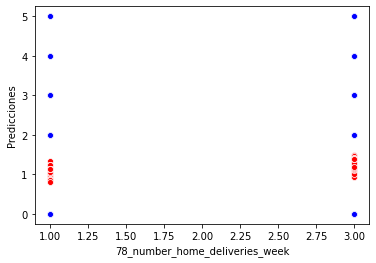

In [113]:
#Visualizamos la gráfica comparativa entre el total real y el total predicho

sns.scatterplot(x='78_number_home_deliveries_week',y='97_number_of_customers_in_store',color='blue',data=data3_iqr)
sns.scatterplot(x='78_number_home_deliveries_week',y='Predicciones',color='red',data=data3_iqr)

In [114]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Var_Indep, y=Var_Dep)
coef_Deter

0.010436383550985084

In [100]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.10215861956284004

# **Regresión Logística**

In [60]:
#Verificamos información del DataFrame
Microretailer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330 entries, 0 to 329
Columns: 106 entries, _record_id to 235_email
dtypes: float64(20), int64(2), object(84)
memory usage: 273.4+ KB


In [76]:
#Declaramos las variables dependientes e independientes para la regresión logística
Var_Indep = Microretailer[['145_number_direct_competitors','97_number_of_customers_in_store','268_number_fridges']]
Var_Dep = Microretailer['310_burnout']

In [77]:
#Redefinimos las variables
X = Var_Indep
y = Var_Dep

In [78]:
#Dividimos el conjunto de datos en la parte de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=None)

In [79]:
#Se escalan todos los datos
escalar = StandardScaler()

In [80]:
#Para realizar el escalamiento de las variables 'x' tanto de entrenamiento como de prueba, utilizamos
X_train = escalar.fit_transform(X_train)
X_test = escalar.transform(X_test)

In [81]:
#Definimos al algoritmo a utilizar
from sklearn.linear_model import LogisticRegression
algoritmo = LogisticRegression()

In [82]:
#Entrenamos el modelo
algoritmo.fit(X_train, y_train)

LogisticRegression()

In [83]:
#Realizamos una predicción
y_pred = algoritmo.predict(X_test)
y_pred

array(['no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'yes', 'no', 'yes',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'yes',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'yes',
       'no'], dtype=object)

In [84]:
#Verifico la matriz de Confusión
from sklearn.metrics import confusion_matrix
Matriz = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión')
print(Matriz)

Matriz de Confusión
[[38  3]
 [22  3]]


In [85]:
#Cálculo la precisión del modelo
from sklearn.metrics import precision_score

precision = precision_score(y_test, y_pred, average='binary', pos_label='yes')
print('Precisión del modelo')
print(precision)

Precisión del modelo
0.5


In [86]:
#Calculo la exactitud del modelo
from sklearn.metrics import accuracy_score

exactitud = accuracy_score(y_test, y_pred)
print('Exactitud del modelo')
print(exactitud)

Exactitud del modelo
0.6212121212121212


In [87]:
#Calculo de la sensibilidad del modelo
from sklearn.metrics import recall_score

sensibilidad = recall_score(y_test, y_pred, average = 'binary', pos_label= 'yes')
print('Sensibilidad del modelo')
print(sensibilidad)

Sensibilidad del modelo
0.12
